# Tutorial based on ['Sample plots in Matplotlib' from matplotlib offical documentation](https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py)

In [66]:
# preparing
import matplotlib.pyplot as plt
import numpy as np

# for pcolormesh
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

%matplotlib inline

## Sample plot

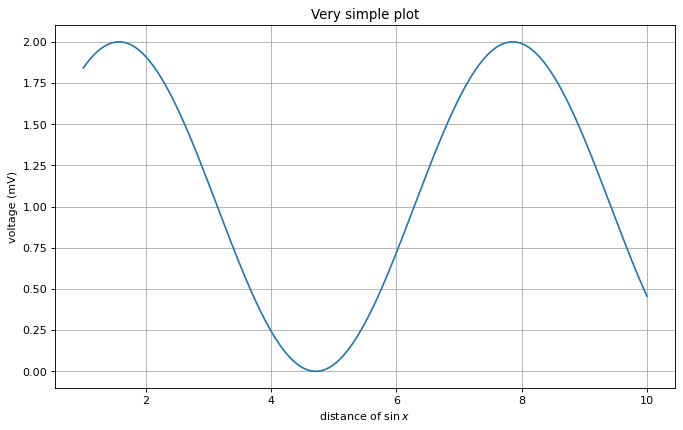

In [40]:
# Data
x = np.linspace(1, 10, 1000)
y = 1 + np.sin(x)

fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

ax.plot(x, y)

ax.set_xlabel(r"distance of $\sin{x}$")
ax.set_ylabel(r"voltage (mV)")
ax.set_title(r"Very simple plot")

ax.grid(True)

## Multiply subplots in one figure

Text(0.5, 0, '$\\cos{x+1} +1$')

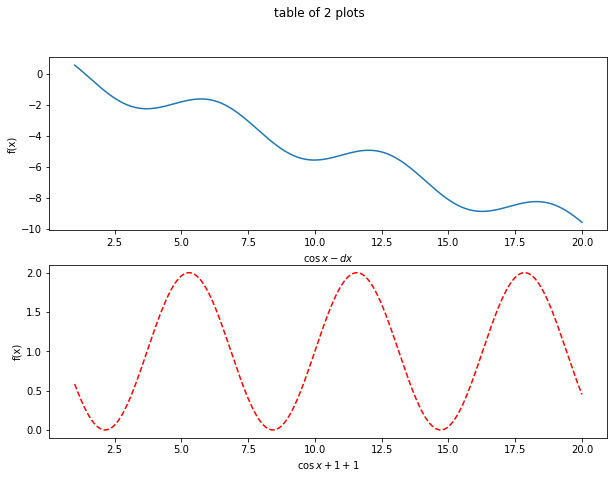

In [62]:
# Data
x = np.linspace(1, 20, 10000)
y1 = np.cos(x) - np.linspace(0, 10, 10000)
y2 = np.cos(x+1)+1

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 7))
(ax1, ax2) = axes

fig.suptitle('table of 2 plots')

ax1.plot(x, y1)
ax1.set_ylabel(r'f(x)')
ax1.set_xlabel(r'$\cos{x} - dx$')

ax2.plot(x, y2, 'r--')
ax2.set_ylabel(r'f(x)')
ax2.set_xlabel(r'$\cos{x+1} +1$')

### alternative method

Text(0.5, 0, '$\\cos{x+1} +1$')

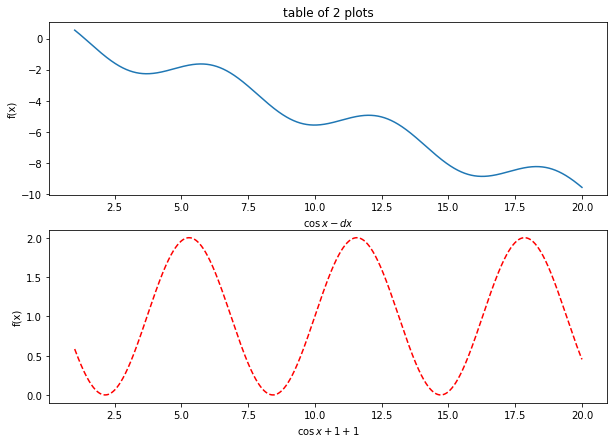

In [65]:
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(x, y1)

plt.title('table of 2 plots')
plt.ylabel(r'f(x)')
plt.xlabel(r'$\cos{x} - dx$')

plt.subplot(2, 1, 2)
plt.plot(x, y2, 'r--')

plt.ylabel(r'f(x)')
plt.xlabel(r'$\cos{x+1} +1$')

## Contouring and pseudocolor

### Basic pcolormesh

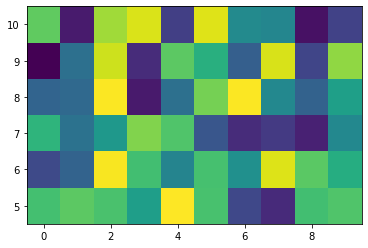

In [67]:
np.random.seed(19680801)
Z = np.random.rand(6, 10)
x = np.arange(-0.5, 10, 1)  # len = 11
y = np.arange(4.5, 11, 1)  # len = 7

fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z)

### Making levels using Norms

In [75]:
# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

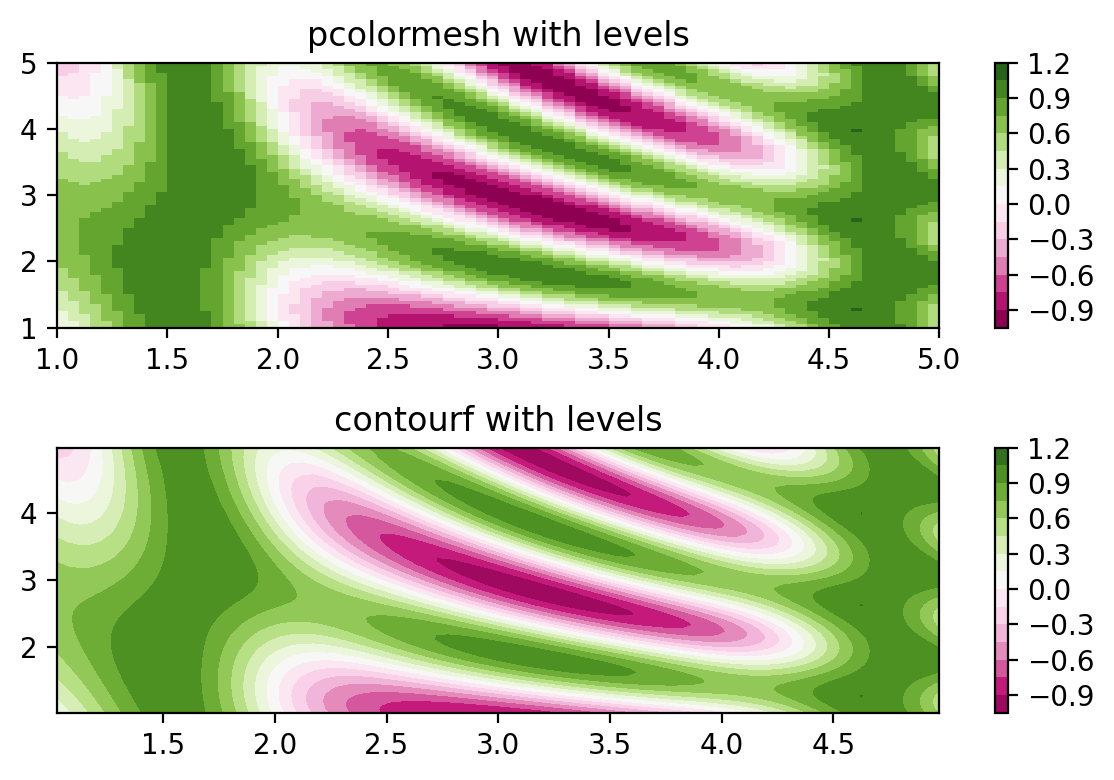

In [81]:
# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[1:5 + dy:dy,
                1:5 + dx:dx]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2, dpi=200)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

## Histogram

Text(0.5, 1.0, 'Histogram of IQ: $\\mu=100$, $\\sigma=15$')

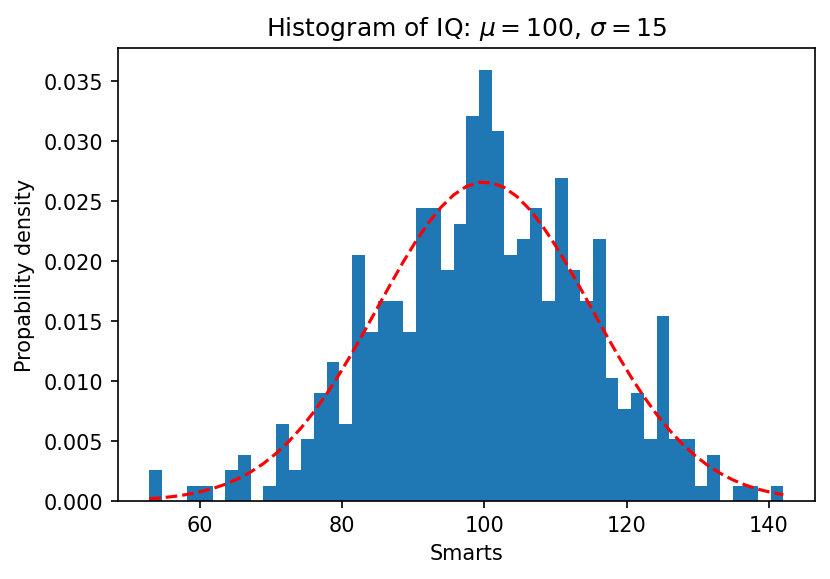

In [91]:
np.random.seed(19680801)

# example data
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots(dpi=150)

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=True)

# best fit
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, 'r--')

ax.set_xlabel('Smarts')
ax.set_ylabel('Propability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

## 3D surface

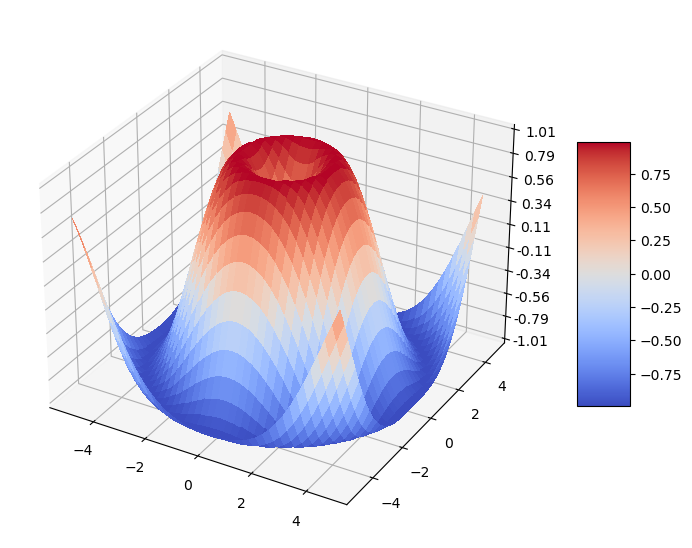

In [102]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7), dpi=100)

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

## Bar charts

<BarContainer object of 4 artists>

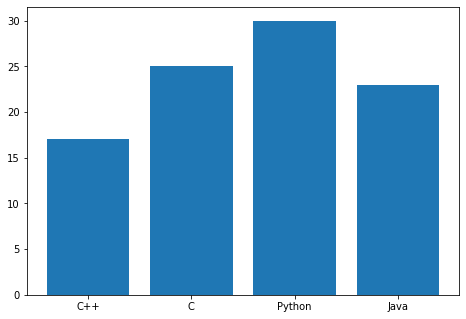

In [106]:
fig, ax = plt.subplots()
langs = ['C++', 'C', 'Python', 'Java']
ax = fig.add_axes([0,0,1,1])

students = [17, 25, 30, 23]
ax.bar(langs, students)

## Pie chart

(-1.2020751266188439,
 1.1122048323062335,
 -1.1138423750166586,
 1.100659160715079)

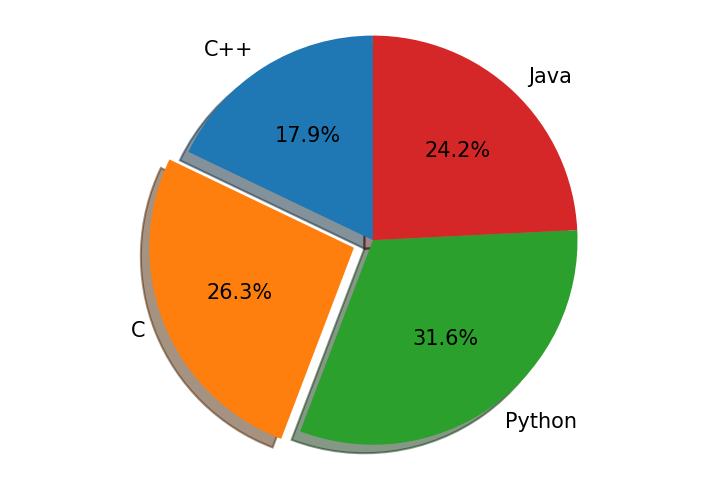

In [112]:
langs = ['C++', 'C', 'Python', 'Java']
students = [17, 25, 30, 23]

explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'C')

fig1, ax1 = plt.subplots(dpi=150)
ax1.pie(students, explode=explode, labels=langs, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

## Table chart

Text(0.5, 1.0, 'Loss by Disaster')

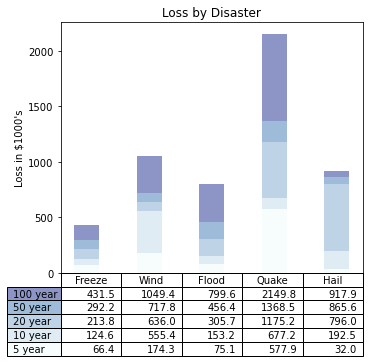

In [129]:
data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]


columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['{} year'.format(x) for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
plt.table(cellText=cell_text,
                  rowLabels=rows,
                  rowColours=colors,
                  colLabels=columns,
                  loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.01)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

## Scatter pli

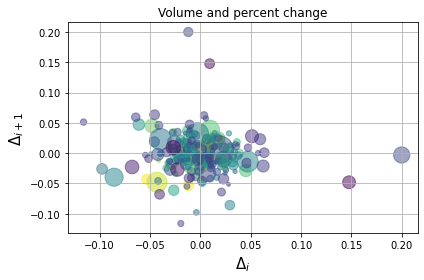

In [131]:
import matplotlib.cbook as cbook
# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
price_data = (cbook.get_sample_data('goog.npz', np_load=True)['price_data']
              .view(np.recarray))
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()


## Log charts

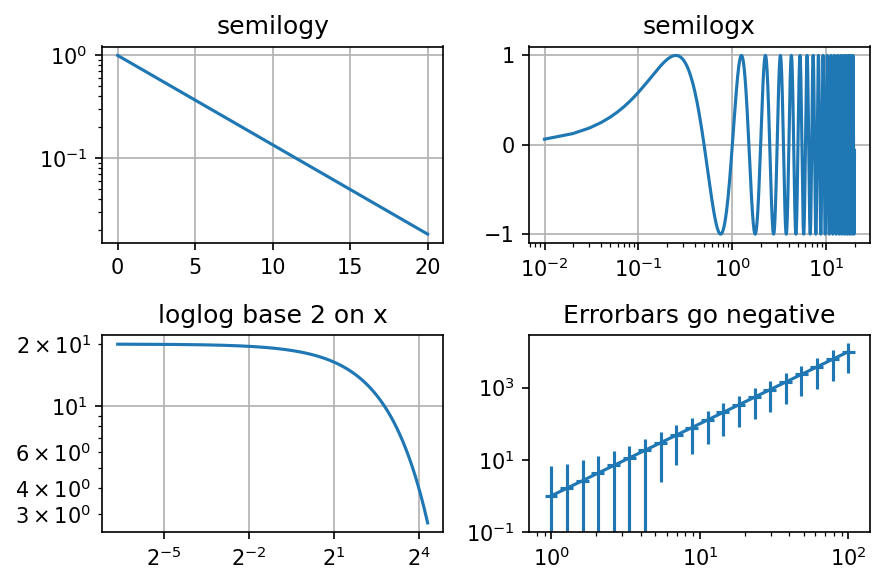

In [135]:
# Data for plotting
t = np.arange(0.01, 20.0, 0.01)

# Create figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, dpi=150)

# log y axis
ax1.semilogy(t, np.exp(-t / 5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t, np.sin(2 * np.pi * t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t, 20 * np.exp(-t / 10.0))
ax3.set_xscale('log', base=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0**np.linspace(0.0, 2.0, 20)
y = x**2.0

ax4.set_xscale("log", nonpositive='clip')
ax4.set_yscale("log", nonpositive='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x, y, xerr=0.1 * x, yerr=5.0 + 0.75 * y)
# ylim must be set after errorbar to allow errorbar to autoscale limits
ax4.set_ylim(bottom=0.1)

fig.tight_layout()